<h1>Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [3]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    result = np.zeros_like(V)
    for i in range(len(X)):
        result += np.dot(X[i], V[i])
    return result


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [6]:
def binarize(M, threshold=0.5):
    return (M > threshold).astype(int)

def test_binarize():
    M = np.array([[0.1, 0.2, 0.3],
                  [0.4, 0.5, 0.6],
                  [0.7, 0.8, 0.9]])
    threshold = 0.5
    expected_result = np.array([[0, 0, 0],
                                [0, 0, 1],
                                [1, 1, 1]])
    assert np.array_equal(binarize(M, threshold), expected_result)
test_binarize()

<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [7]:
def unique_rows(mat):
    return [np.unique(row) for row in mat]

def unique_columns(mat):
    return [np.unique(col) for col in mat.T]

def test_unique_rows():
    mat = np.array([[1, 2, 3],
                    [4, 5, 6],
                    [7, 8, 9]])
    expected_result = [np.array([1, 2, 3]), np.array([4, 5, 6]), np.array([7, 8, 9])]
    assert all(np.array_equal(row, expected) for row, expected in zip(unique_rows(mat), expected_result))

def test_unique_columns():
    mat = np.array([[1, 2, 3],
                    [4, 5, 6],
                    [7, 8, 9]])
    expected_result = [np.array([1, 4, 7]), np.array([2, 5, 8]), np.array([3, 6, 9])]
    assert all(np.array_equal(col, expected) for col, expected in zip(unique_columns(mat), expected_result))

test_unique_rows()
test_unique_columns()

<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

In [8]:
def random_normal_matrix(m, n):
    return np.random.randn(m, n)

def compute_stats(matrix):
    row_means = np.mean(matrix, axis=1)
    row_vars = np.var(matrix, axis=1)
    col_means = np.mean(matrix, axis=0)
    col_vars = np.var(matrix, axis=0)
    return row_means, row_vars, col_means, col_vars

def plot_histograms(matrix):
    m, n = matrix.shape
    for i in range(m):
        plt.figure(figsize=(8, 6))
        plt.hist(matrix[i], bins=20, edgecolor='black')
        plt.title(f'Histogram for Row {i+1}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.show()

    for j in range(n):
        plt.figure(figsize=(8, 6))
        plt.hist(matrix[:, j], bins=20, edgecolor='black')
        plt.title(f'Histogram for Column {j+1}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.show()

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [9]:
def chess(m, n, a, b):
    matrix = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i, j] = a
            else:
                matrix[i, j] = b
    return matrix

def test_chess():
    assert np.array_equal(chess(2, 2, 0, 1), np.array([[0, 1], [1, 0]]))
    assert np.array_equal(chess(3, 3, 5, 8), np.array([[5, 8, 5], [8, 5, 8], [5, 8, 5]]))

test_chess()

<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

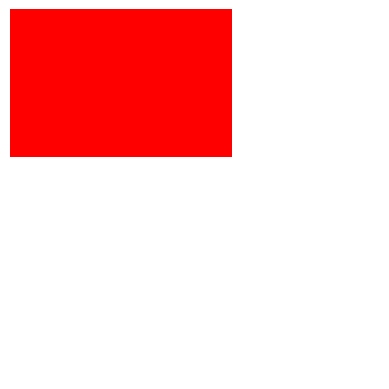

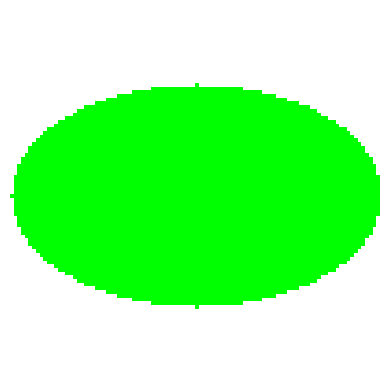

In [10]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    image = np.zeros((m, n, 3), dtype=np.uint8)
    image[:, :] = background_color
    for i in range(m):
        for j in range(n):
            if 0 <= i < a and 0 <= j < b:
                image[i, j] = rectangle_color
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    image = np.zeros((m, n, 3), dtype=np.uint8)
    image[:, :] = background_color
    for i in range(m):
        for j in range(n):
            if ((i - m//2) / a)**2 + ((j - n//2) / b)**2 <= 1:
                image[i, j] = ellipse_color
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def test_draw_shapes():
    draw_rectangle(40, 60, 100, 100, (255, 0, 0), (255, 255, 255))

    draw_ellipse(30, 50, 100, 100, (0, 255, 0), (255, 255, 255))

test_draw_shapes()


<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [11]:
def compute_statistics(time_series):
    mean = np.mean(time_series)
    variance = np.var(time_series)
    std_deviation = np.std(time_series)
    return mean, variance, std_deviation

def find_local_extrema(time_series):
    local_maxima = []
    local_minima = []
    for i in range(1, len(time_series) - 1):
        if time_series[i] > time_series[i - 1] and time_series[i] > time_series[i + 1]:
            local_maxima.append((i, time_series[i]))
        elif time_series[i] < time_series[i - 1] and time_series[i] < time_series[i + 1]:
            local_minima.append((i, time_series[i]))
    return local_maxima, local_minima

def moving_average(time_series, window_size):
    moving_avg_series = []
    for i in range(len(time_series) - window_size + 1):
        window = time_series[i:i+window_size]
        moving_avg = np.mean(window)
        moving_avg_series.append(moving_avg)
    return moving_avg_series

time_series = [1, 3, 5, 7, 9, 8, 6, 4, 2, 0, 2, 4, 6, 8, 7, 5, 3, 1]

# Вычисление статистик
mean, variance, std_deviation = compute_statistics(time_series)
print("Mean:", mean)
print("Variance:", variance)
print("Standard Deviation:", std_deviation)

# Поиск локальных экстремумов
local_maxima, local_minima = find_local_extrema(time_series)
print("Local Maxima:", local_maxima)
print("Local Minima:", local_minima)

# Вычисление скользящего среднего
window_size = 3
moving_avg_series = moving_average(time_series, window_size)
print("Moving Average Series:", moving_avg_series)

Mean: 4.5
Variance: 6.916666666666667
Standard Deviation: 2.6299556396765835
Local Maxima: [(4, 9), (13, 8)]
Local Minima: [(9, 0)]
Moving Average Series: [3.0, 5.0, 7.0, 8.0, 7.666666666666667, 6.0, 4.0, 2.0, 1.3333333333333333, 2.0, 4.0, 6.0, 7.0, 6.666666666666667, 5.0, 3.0]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [12]:

def one_hot_encoding(labels, num_classes):
    one_hot_encoded = np.zeros((len(labels), num_classes), dtype=int)
    for i, label in enumerate(labels):
        one_hot_encoded[i, label] = 1
    return one_hot_encoded

# Пример использования функции
labels = [0, 2, 3, 0]
num_classes = 4
one_hot_encoded = one_hot_encoding(labels, num_classes)
print(one_hot_encoded)

[[1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]
